Name: Hanh Tran

DSC 680

Project 3 - This project will use tensorflow 2.0 Keras API to perform a classification task. Specifically to predict if a new customer will default on a loan based on the variables of historical information from other borrowers. 

The dataset I’ll be examining is the Lending Club Data set from Kaggle, which can be found at:
https://www.kaggle.com/wordsforthewise/lending-club


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#show visualization in jupyter
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
#read in features info
data_features = pd.read_csv('lending_club_features.csv', index_col='LoanStatNew')

In [10]:
data_features

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [12]:
print(data_features.loc['loan_amnt']['Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [13]:
#function to return feature description
def feat_info(col_name):
    print(data_features.loc[col_name]['Description'])

In [14]:
feat_info('dti')

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [17]:
df = pd.read_csv('lending_club_loan.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis

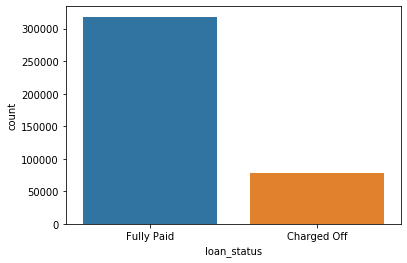

In [21]:
#countplot to explore the balancing of labels (target variable is loan_status)
sns.countplot(x='loan_status', data=df)
#precision, recall and accuracy for evaluation. Shows an imbalance dataset

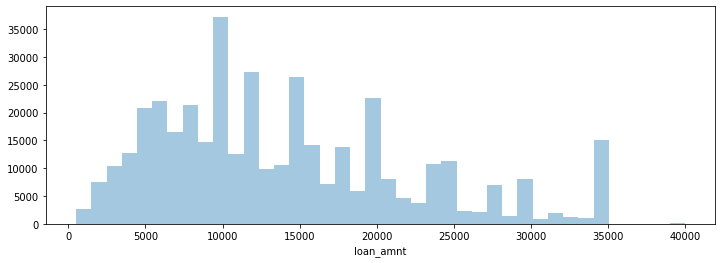

In [23]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'], kde=False, bins=40)
#bin spikes at even amounts of money are basically standard loans

In [24]:
#explore correlation between the continuous feature variables 
#calculate the correlation between all continuous numeric variables
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


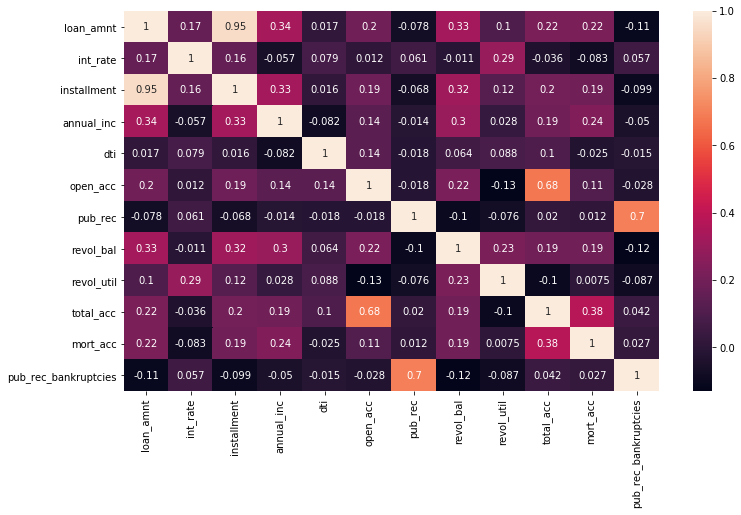

In [26]:
#visualize correlation of variables using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)

There is an unsually high correlation between the installment feature and loan amount. I don't want there to be a feature that is a near perfect correlation with the feature label because there might be duplicate information thats similar to the label

In [27]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [28]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


So it looks like there is a closer relationship due to an internal formula between loan amount and installment. There is a direct function of the loan amount to figure out the installment

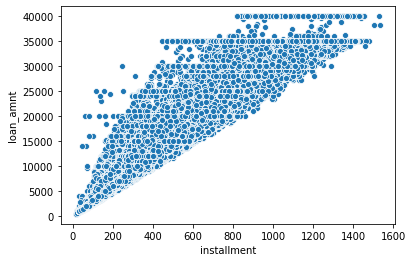

In [29]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

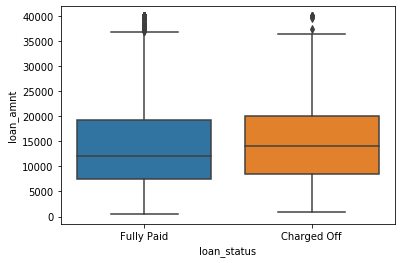

In [30]:
#boxplot to show relationship between the loan_status and the loan amount

sns.boxplot(x='loan_status', y='loan_amnt', data=df)

is there a relationship between really expensive loans and not begin able to pay them off or a very low amount loans and then fully paying those off? Box plot shows that the charged off loans on average is slightly higher, meaning that if the loan
amount is higher, there is a slight increase in the likelihood of it being charged off. However, it is not a key indicator. 

In [31]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The summary statistics show that the averages of the loans for people that aren't able to pay back are slightly higher than the averages for people that do pay off their loans.

In [33]:
#Grade and SubGrade columns that LendingClub attributes to the loans. Unique grades and subgrades
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [59]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [34]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [60]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [36]:
feat_info('grade')

LC assigned loan grade


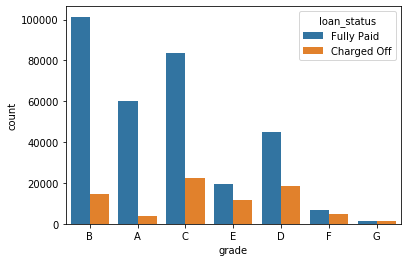

In [37]:
#create countplot per grade - differentiation between fully paying off loan or having it be charged off based off grade.
sns.countplot(x='grade', data=df, hue='loan_status')

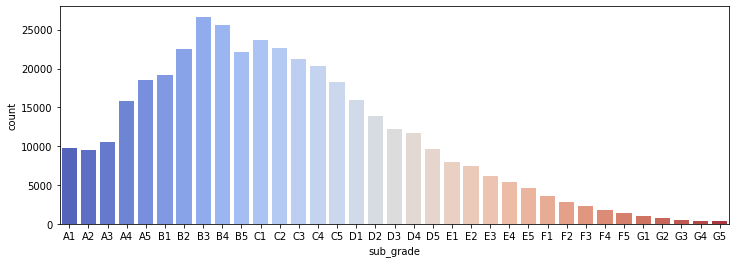

In [44]:
#get a countplot of subgrades
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm')

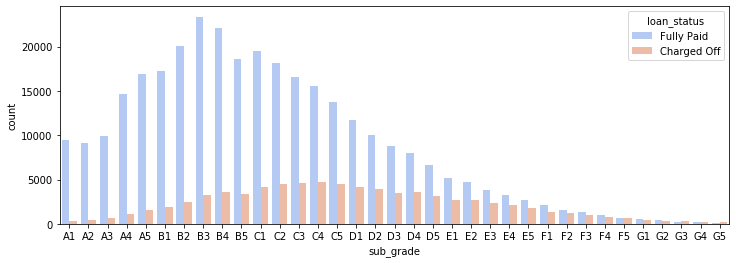

In [45]:
f_and_g = df[df['grade']=='G' | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm', hue='loan_status')

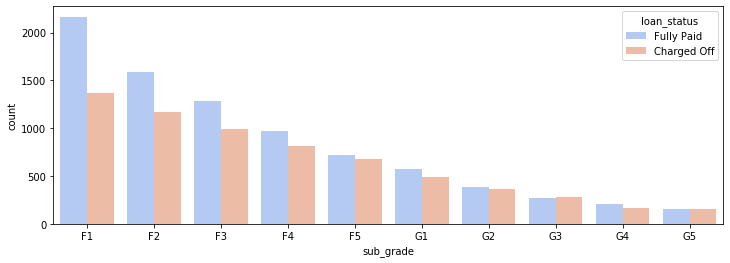

In [49]:
#subset data for worst subgrades
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, order=subgrade_order, palette='coolwarm', hue='loan_status')

the fully paid status versus Charged off status for the worst grades. grade G5, the likelihood is almost the same as fully

paying off loan versus being charged off on the loan.

In [61]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [66]:
#create column 'loan_repaid' which contains a 1 if loan status is "Fully paid" and 0 if it was "charged off"
#current data for label variable is a string, change to numeric
df['loan_repaid']= df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


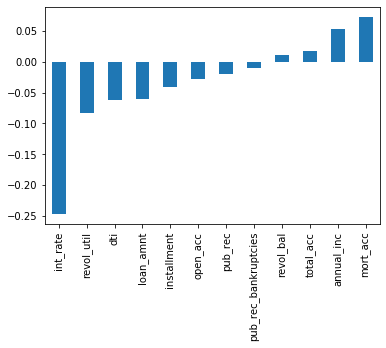

In [67]:
#create bar plot showing correlation of numeric features to new loan_repaid column
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar', x='', y='frontage')


interest rate has the highest negative correlation with whether or not someone's going to repay their loan

In [64]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",NaN


In [68]:
len(df)

396030

In [69]:
#find missing values in variables
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [70]:
#convert to percentage of the total dataframe
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [71]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [72]:
df['emp_title'].nunique()

173105

In [73]:
df['emp_title'].value_counts()

Teacher                       4389
Manager                       4250
Registered Nurse              1856
RN                            1846
Supervisor                    1830
                              ... 
Pension Administrator            1
A&MPRODUCTS                      1
Van Ausdall & Farrar             1
Indian River State College       1
Deputy Director for OMB          1
Name: emp_title, Length: 173105, dtype: int64

Removing the emp_title variable as there are too many unique job titles to convert to a dummy variable feature

In [74]:
df = df.drop('emp_title',axis=1)

In [75]:
#Create a count plot of the emp_length feature column and sort
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [77]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

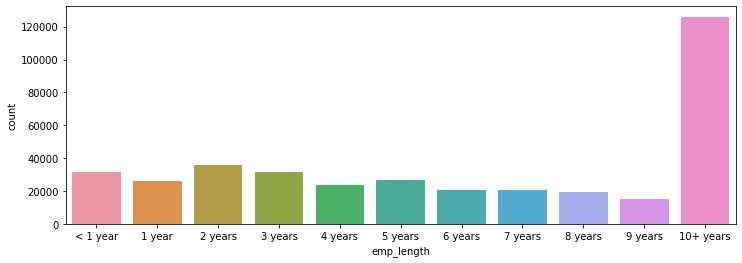

In [78]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

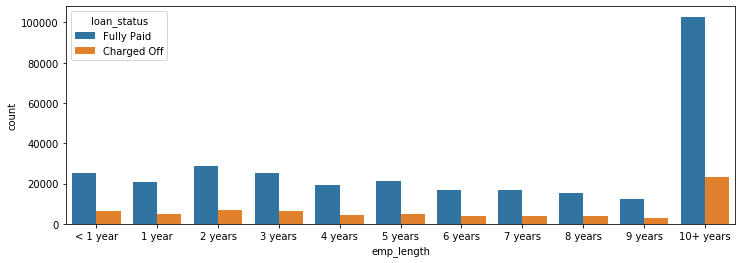

In [79]:
#countplot with a hue separating Fully Paid vs Charged Off
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [80]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [81]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [82]:
emp_len = emp_co/emp_fp

In [83]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

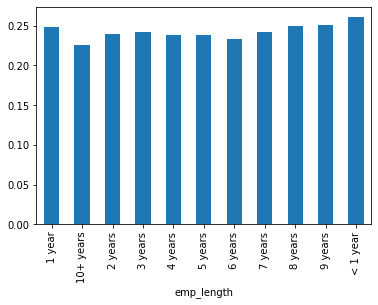

In [84]:
emp_len.plot(kind='bar')

Since the charged off rates are the same across all employment lengths, I am dropping the emp_length variable

In [86]:
df = df.drop('emp_length',axis=1)

In [87]:
#review for missing data
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Check if the title variable is duplicated information for purpose column

In [88]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [89]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

drop the title column because it is duplicate information of the purpose variable

In [90]:
df = df.drop('title',axis=1)

In [91]:
feat_info('mort_acc')

Number of mortgage accounts.


In [92]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [93]:
#check correlation of other variables to mort_acc variable
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

total_acc feature correlates with the mort_acc. Group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc

In [94]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [95]:
#fill in the missing mort_acc values based on their total_acc value
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']


If the mort_acc is missing, then fill in that missing value with the mean value corresponding to its total_acc value from the Series created above

In [96]:
total_acc_avg[2.0]

0.0

In [97]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [98]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [ ]:
df.isnull().sum()

Removing variables revol_util and the pub_rec_bankruptcies because there is missing data and also they account for less than 0.5% of the total data

In [99]:
df = df.dropna()

In [100]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

Convert string values to categorical columns

In [101]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [102]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [103]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

Dropping the grade variable because it is just part of the sub_grade variable

In [104]:
df = df.drop('grade',axis=1)

In [105]:
#Convert the subgrade into dummy variables
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [106]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [107]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [108]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

Convert columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. set drop_first=True and drop the original columns.

In [109]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [110]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Convert these to dummy variables, but replace NONE and ANY with OTHER, so there will only be 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe

In [111]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [112]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [113]:
#convert zip_code column into dummy variables using pandas. Concatenate the result and 
#drop the original zip_code column along with dropping the address column.
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [114]:
#drop issue_date variable as it is not relevant in modeling
df = df.drop('issue_d',axis=1)

In [115]:
#historical time stamp feature. Extract the year from this feature using a .apply function, 
#convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.
#drop the earliest_cr_line feature.
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [116]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [120]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [121]:
print(len(df))

395219


In [122]:
#Use a MinMaxScaler to normalize the feature data X_train and X_test. only fit on the X_train data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [126]:
scaler = MinMaxScaler()

In [127]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

In [128]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [129]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3030 - val_loss: 0.2619
Epoch 2/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2665 - val_loss: 0.2599
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2632 - val_loss: 0.2595
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2624 - val_loss: 0.2595
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2613 - val_loss: 0.2592
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2610 - val_loss: 0.2590
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2604 - val_loss: 0.2594
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2600 - val_loss: 0.2594
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2598 - val_loss: 0.2591
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.259

In [130]:
#save model
model.save('full_data_project_model.h5')

## Evaluate Model

In [131]:
losses = pd.DataFrame(model.history.history)

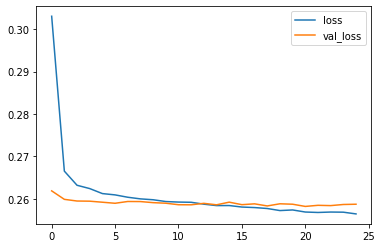

In [132]:
#Plot out the validation loss versus the training loss
losses[['loss','val_loss']].plot()

In [134]:
#Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.98      0.44      0.60     15470
           1       0.88      1.00      0.93     63574

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [135]:
confusion_matrix(y_test,predictions)

array([[ 6753,  8717],
       [  132, 63442]], dtype=int64)

In [136]:
#simulation of a new customer
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [137]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

In [138]:
df.iloc[random_ind]['loan_repaid']

1.0

Sim Customer actually paid back loan